In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [9]:
# XOR input and output
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [11]:
# MLP class
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.uniform(-1, 1, (input_size, hidden_size))
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.uniform(-1, 1, (hidden_size, output_size))
        self.bias_output = np.zeros((1, output_size))

    def forward(self, X):
        self.hidden = sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        self.output = sigmoid(np.dot(self.hidden, self.weights_hidden_output) + self.bias_output)
        return self.output

    def backward(self, X, y, lr):
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)

        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden)

        self.weights_hidden_output += self.hidden.T.dot(output_delta) * lr
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * lr
        self.weights_input_hidden += X.T.dot(hidden_delta) * lr
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs=10000, lr=0.1):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, lr)

In [12]:
# Train the model
mlp = MLP(input_size=2, hidden_size=4, output_size=1)
mlp.train(X_scaled, y, epochs=10000, lr=0.1)

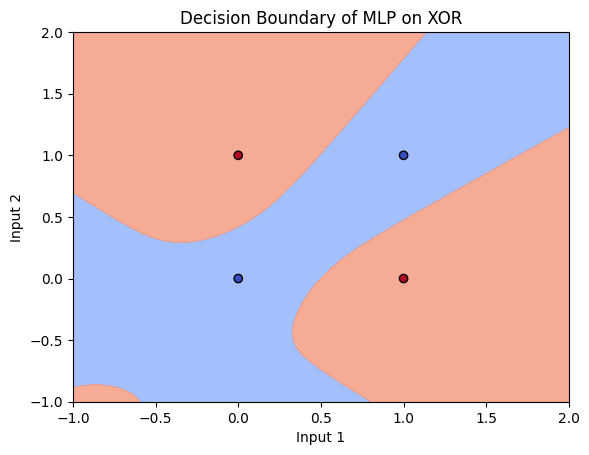

In [13]:
# Decision boundary plot
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_scaled = scaler.transform(grid)
    preds = model.forward(grid_scaled).reshape(xx.shape)
    plt.contourf(xx, yy, preds, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap="coolwarm", edgecolors="k")
    plt.title("Decision Boundary of MLP on XOR")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

plot_decision_boundary(mlp, X, y)